In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def draw(nb_list):
    for nb in nb_list:
        data_lamb, data_seed, data_error = [], [], []

        f = open(f"sweep_lamb_noisy_{nb}blocks_t=1.txt")
        for line in f.readlines():
            line = line.strip().replace("#blocks =", "").replace("lamb =", "").replace(
                "t =", "").replace("seed =", "").replace("error =", "").replace(",", "")
            _, lamb, _, seed, error = line.split()
            data_lamb.append(int(lamb))
            data_seed.append(int(seed))
            data_error.append(float(error))
        f.close()

        df = pd.DataFrame(data={
            "lamb": data_lamb,
            "seed": data_seed,
            "error": data_error
        })

        assert np.all(df["lamb"].unique() == 2 ** np.arange(5, 15))

        newdf = df.groupby("lamb")["error"].agg(['count', 'mean', 'std']).reset_index()
        print(f"{nb} blocks:")
        print(newdf)
        print("\n")
        lamb_arr = newdf["lamb"].to_numpy()
        mean_arr = newdf["mean"].to_numpy()
        std_arr = newdf["std"].to_numpy()

        plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                     label=f'{nb} blocks',
                     fmt='o', markersize=3, zorder=2)

        lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
        plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
                label='fitted line (slope$={:.3f}$)'.format(lr.slope),
                color=plt.gca().lines[-1].get_color(),
                zorder=1,
                linestyle="--")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(r"$\lambda_{\mathrm{pen}}$")
    plt.ylabel("error")
    plt.title(r"$t=1$")
    plt.legend(ncol=2, prop={'size': 8})
    plt.grid()
    plt.savefig("sweep_lamb_noisy_t=1.pdf", format="pdf", bbox_inches="tight")
    plt.show()

1 blocks:
    lamb  count      mean       std
0     32     50  0.030450  0.008693
1     64     50  0.014690  0.004774
2    128     50  0.007776  0.001962
3    256     50  0.003748  0.001084
4    512     50  0.001846  0.000493
5   1024     50  0.000938  0.000240
6   2048     50  0.000483  0.000117
7   4096     50  0.000245  0.000061
8   8192     50  0.000118  0.000031
9  16384     50  0.000060  0.000017


2 blocks:
    lamb  count      mean       std
0     32     50  0.144526  0.019512
1     64     50  0.094461  0.013262
2    128     50  0.068677  0.010668
3    256     50  0.047281  0.007016
4    512     50  0.033114  0.005026
5   1024     50  0.023090  0.003586
6   2048     50  0.016093  0.002472
7   4096     50  0.011714  0.001874
8   8192     50  0.008515  0.001256
9  16384     50  0.006011  0.000931


3 blocks:
    lamb  count      mean       std
0     32     50  0.198978  0.009829
1     64     50  0.132602  0.008357
2    128     50  0.095488  0.005573
3    256     50  0.066902  0.0

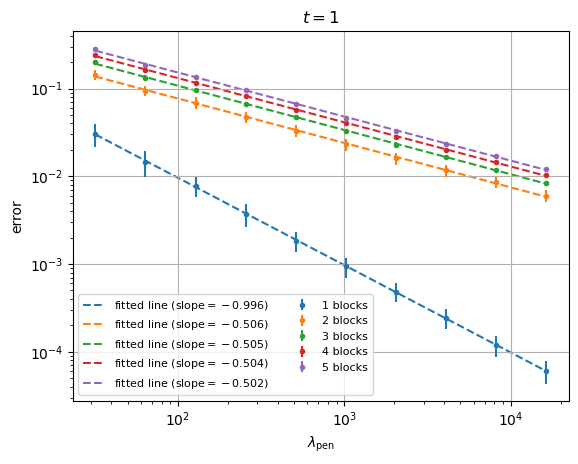

In [3]:
draw([1,2,3,4,5])

In [4]:
l = [1,2,3]

In [5]:
l[::-1]

[3, 2, 1]